In [1]:
import sys
sys.path.append('../src/')
from xpcs import *
from sims import *
from autocorrelations import *
import cv2
from scipy.special import erfinv
import pyopencl as cl

%matplotlib notebook

In [11]:
path = '/Users/eriklamb/Documents/Data/XRD/'

file1 = 'NBH/mo_JB_NBH_03_0001.txt'
file2 = 'Sulfides_XRD/Na3PS4_cubic.txt'
file3 = 'NBH/mo_JB_B12_03_0001.txt'

file2 = 'NBH/mo_JB_B10_03_0001.txt'

xrd1 = np.loadtxt(path+file1)
xrd2 = np.loadtxt(path+file2)
xrd3 = np.loadtxt(path+file3)

<IPython.core.display.Javascript object>


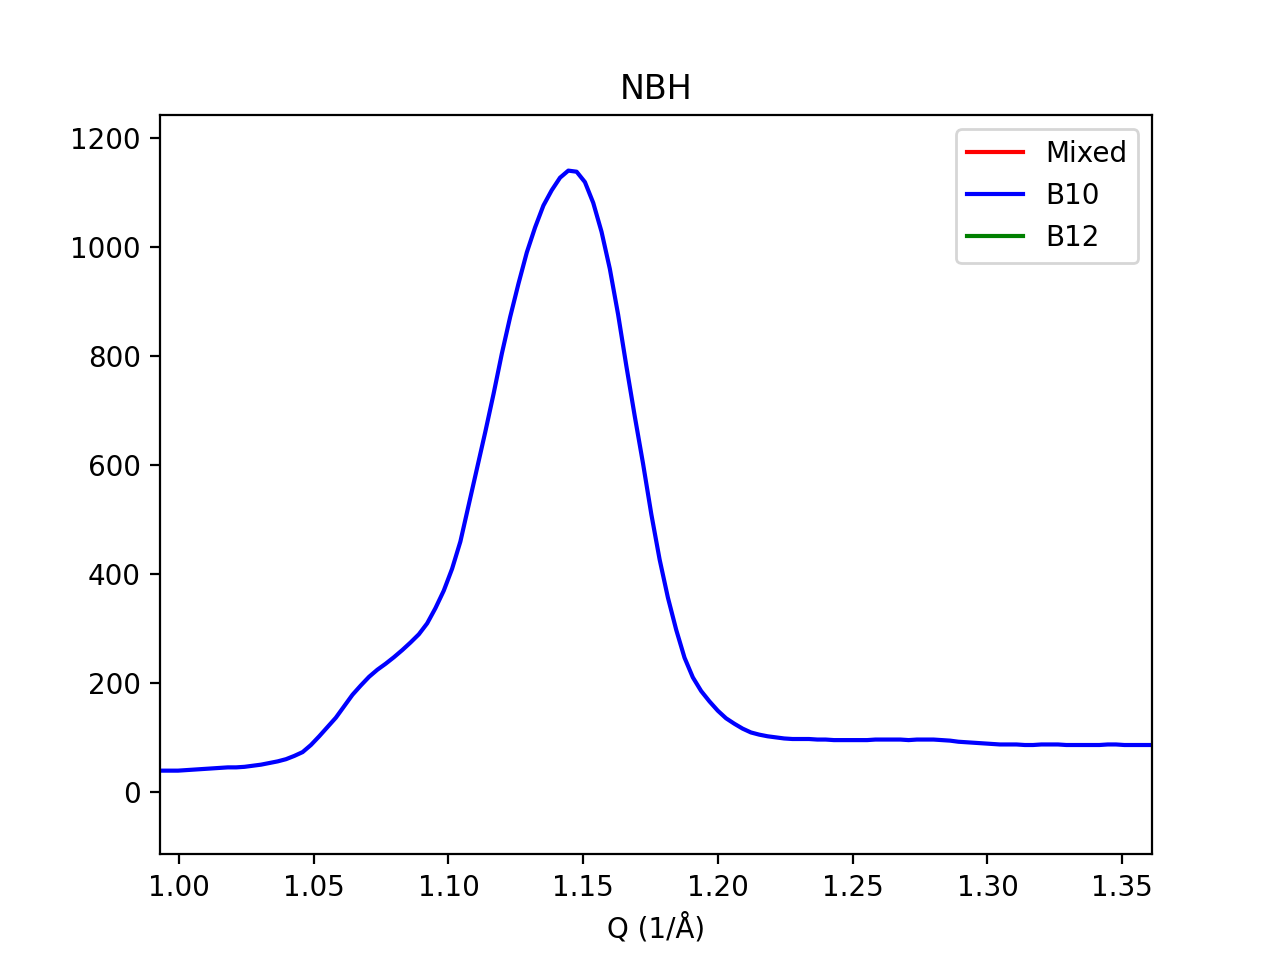

Text(0.5, 1.0, 'NBH')

In [14]:
fig, ax = plt.subplots()

#ax.plot(xrd[:,0],xrd[:,1],'b',label="Mo")
ax.plot(th2q(12.4,newtth('Mo',12.4,xrd1[:,0])),xrd1[:,1]+3000,'r',label="Mixed")
ax.plot(th2q(12.4,newtth('Mo',12.4,xrd2[:,0])),xrd2[:,1],'b',label="B10")
ax.plot(th2q(12.4,newtth('Mo',12.4,xrd3[:,0])),xrd3[:,1]+1250,'g',label="B12")
ax.set_xlabel('Q (1/Å)')
ax.legend()
ax.set_title('NBH')

Correlation Length: -557.1489839711815 nm
Correlation Length: -557.1489839711815 nm
Volume Illuminated By the Beam: 358389675655091.94 nm^3
Probability of Being in (120) Condition: 0.0011129981678233215
Estimated Number of Grains in 5x5um Spot Size: -4404.912528080125


<IPython.core.display.Javascript object>


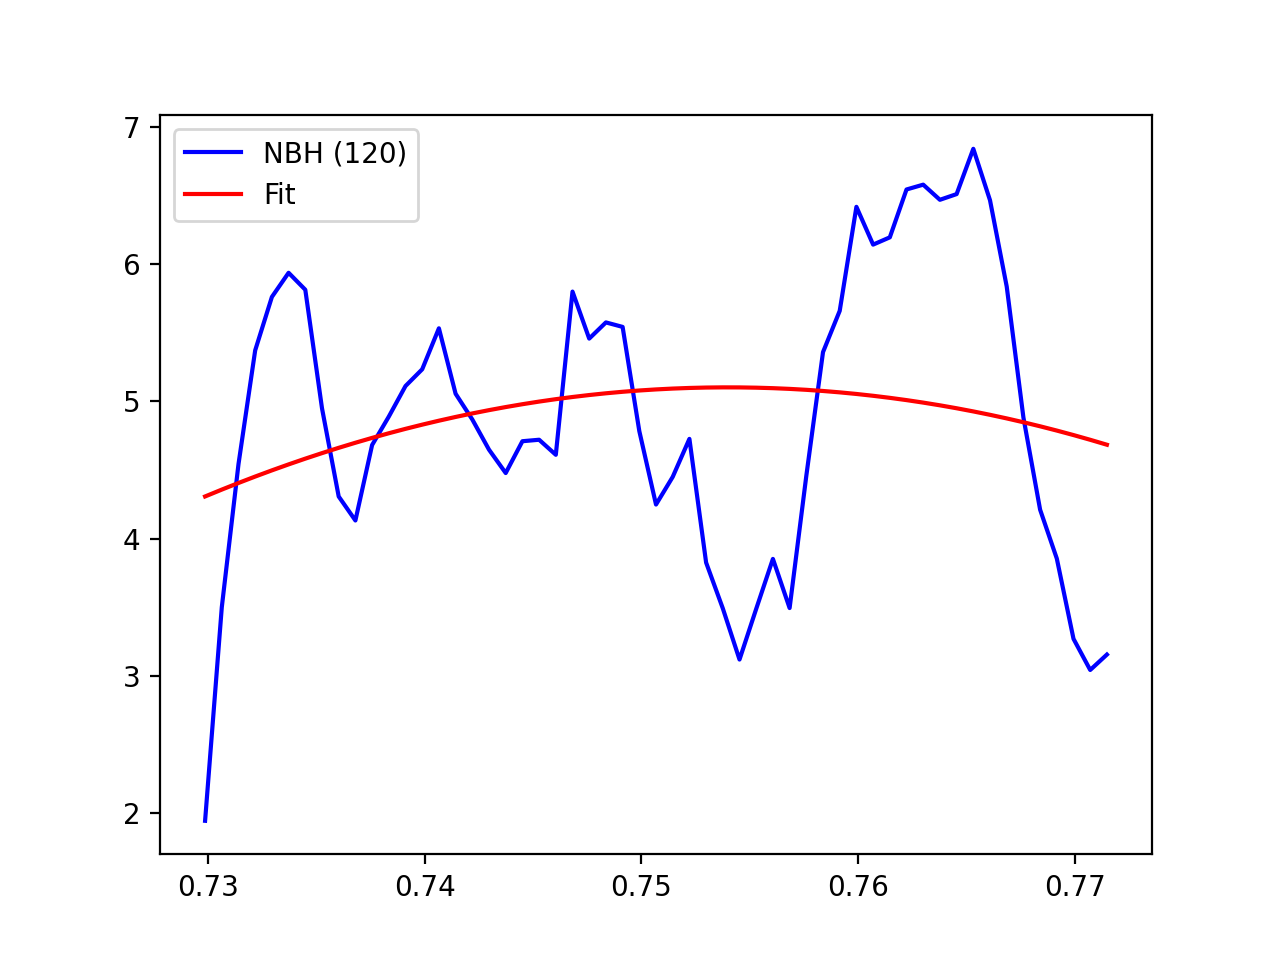

In [4]:
# Complete XRD
qs = th2q(12.4,newtth('Mo',12.4,xrd2[:,0]))
Is = xrd2[:,1]

# (120) Peak
I120 = Is[145:200]
Q120 = qs[145:200]

# Probability of being in the (120) peak
Prob120 = np.sum(I120)/np.sum(Is)

# Volume of sample illuminated by beam
samth = 4 #deg
thickness = 1 #mm
Vol_beam = ((thickness/np.sin(samth*np.pi/180))*(5*10**(-3))**2)*(10**(6))**3

# Fit gaussian to extract correlation length
popt,pcov = curve_fit(gaussian,Q120,I120,p0 = [np.max(I120), Q120[np.argmax(I120)], 0.02, np.min(I120[np.nonzero(I120)])])

# Correlation length
l_corr = 2*np.pi/2.355*popt[3]/10

print(f'Correlation Length: {l_corr} nm')
print(f'Correlation Length: {l_corr} nm')
print(f'Volume Illuminated By the Beam: {Vol_beam} nm^3')
print(f'Probability of Being in (120) Condition: {Prob120}')
print(f'Estimated Number of Grains in 5x5um Spot Size: {Prob120*Vol_beam/(4*np.pi*(l_corr/2)**3/3)}')


# Plotting                
fig, ax = plt.subplots()

ax.plot(qs[145:200],Is[145:200],'b',label = 'NBH (120)')
ax.plot(qs[145:200],gaussian(qs[145:200],*popt),'r', label = 'Fit')
ax.legend()

In [29]:
1/np.sin(4*np.pi/180)

14.335587026203676

<IPython.core.display.Javascript object>


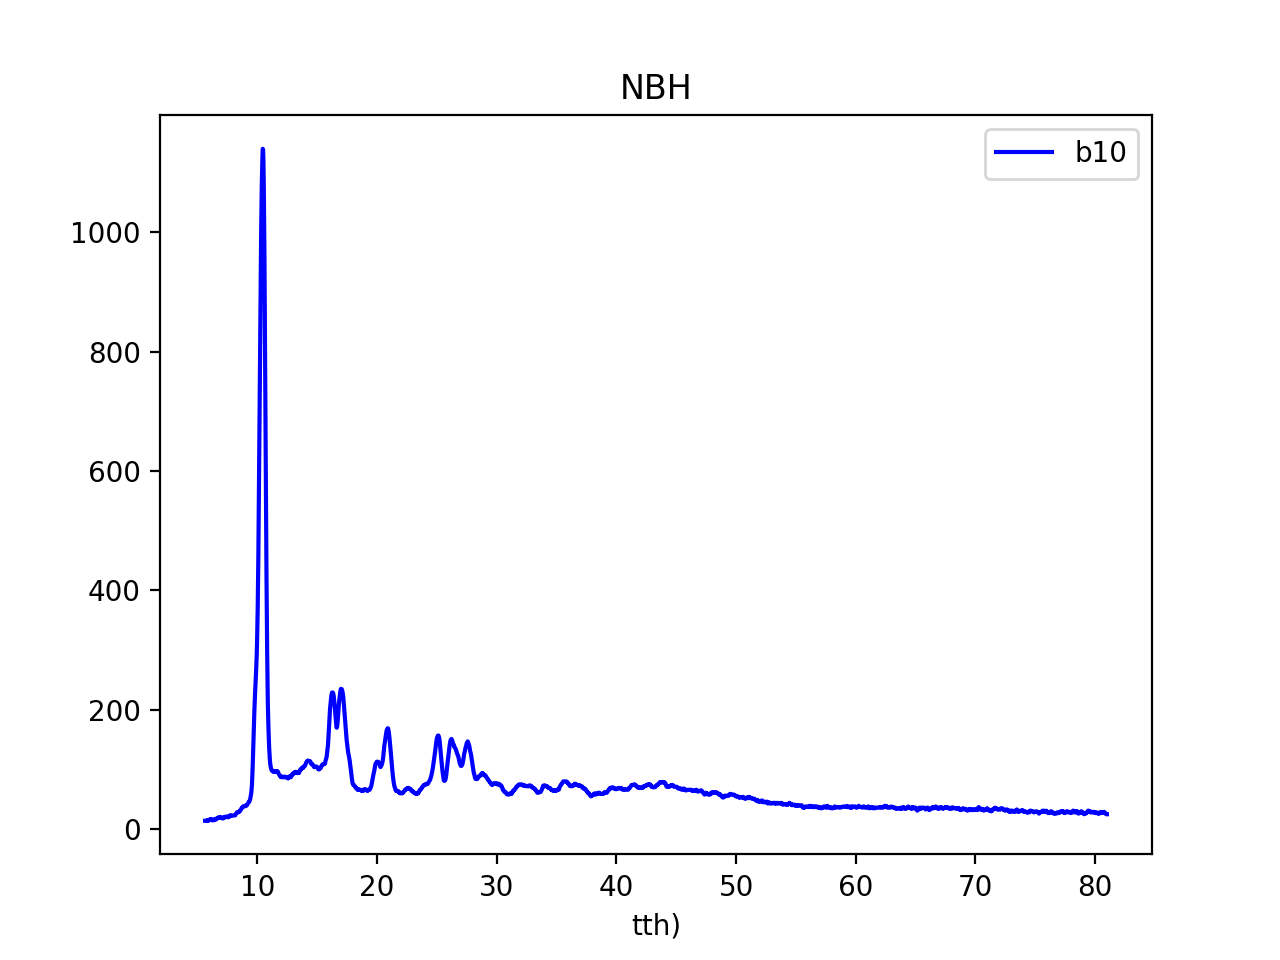

Text(0.5, 1.0, 'NBH')

In [13]:
fig, ax = plt.subplots()

#ax.plot(xrd[:,0],xrd[:,1],'b',label="Mo")
#ax.plot(newtth('Mo',12.4,xrd1[:,0]),xrd1[:,1]+3000,'r',label="Mixed")
ax.plot(newtth('Mo',12.4,xrd2[:,0]),xrd2[:,1],'b',label="b10")
#ax.plot(newtth('Mo',12.4,xrd3[:,0]),xrd3[:,1]+1250,'g',label="NPS-BM-HT")
ax.set_xlabel('tth)')
ax.legend()
ax.set_title('NBH')

<IPython.core.display.Javascript object>


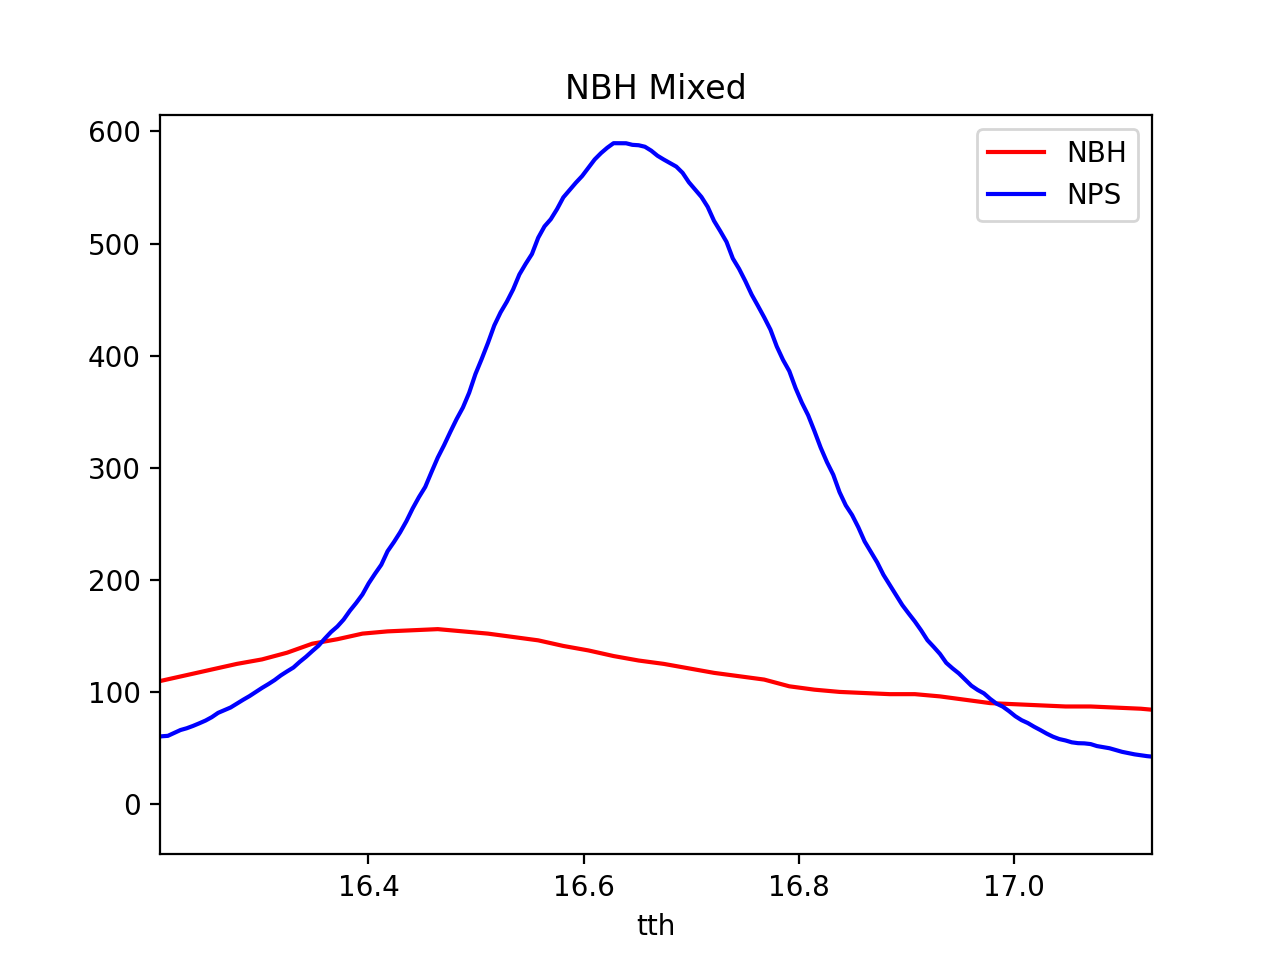

Text(0.5, 1.0, 'NBH Mixed')

In [34]:
fig, ax = plt.subplots()

#ax.plot(xrd[:,0],xrd[:,1],'b',label="Mo")
ax.plot(newtth('Mo',15,xrd1[:,0]),xrd1[:,1],'r',label="NBH")
ax.plot(newtth('Mo',15,xrd2[:,0]),xrd2[:,1],'b',label="NPS")
ax.set_xlabel('tth')
ax.legend()
ax.set_title('NBH Mixed')

In [39]:
Dual_Z_0 = 0.65925
o = np.tan(8.646*np.pi/180)*2.997

print(f'Absolute Movement: {(Dual_Z_0-o)*1000000} um')

Absolute Movement: 203534.8853221278 um


In [22]:
Aluminum = newtth(11.3,15,27.16)

print(f'At 15keV, first-order Aliuminum reflection is at {Aluminum} 2Th')

At 15keV, first-order Aliuminum reflection is at 20.376720029926513 2Th


In [ ]:
(0.225774-0.210774)

In [26]:
th1 = np.arctan((Dual_Z_0-0.225774)/2.997)*180/np.pi
th2 = np.arctan((Dual_Z_0-0.210774)/2.997)*180/np.pi

th1

8.229995700143832


B10 Dual Z = 0.203534, for 2TH = 8.646 4
Mixed Dual Z = 0.225774, for 2TH = 8.231 
NPS Dual Z = 152882, for 2TH = 9.59 
